<a href="https://colab.research.google.com/github/NiklasTR/bmi707/blob/master/Assignment1_Niklas_Rindtorff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Backpropagation and Multilayer Neural Networks

Your Name: Niklas Rindtorff

Name of the Students You Worked With: NA

References You Consulted:

Feel free to use the Google Colab environment (https://colab.research.google.com/notebooks/welcome.ipynb) or follow the instructions on the course website (https://hms-dbmi.github.io/BMI_707/resources/) to setup python environment.

## Part 1: Data Exploration (20 points)
In this assignment, we will use a modified dataset from the Pima Indian Diabetes Database (https://www.kaggle.com/uciml/pima-indians-diabetes-database). This dataset is released under the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication (https://creativecommons.org/publicdomain/zero/1.0/).

Below is a brief data description of this dataset from Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database):
"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage." "The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on."

**Please note that we have modified the dataset a little to simplify the analyses. Please use the codes below to read in the modified files.**

In [0]:
# import python packages
import numpy as np              # linear algebra
import pandas as pd             # to process the input files

import matplotlib.pyplot as plt # for plotting
%matplotlib inline


import scipy 


In [108]:
# updating the plotting library
!pip install seaborn==0.9.0
import seaborn as sea

In [109]:
# read in the data files; please use these files, instead of the raw files from the Pima Indian Diabetes Database
train_data = pd.read_csv('https://www.dropbox.com/s/n0jjos6faoyqncp/diabetesTrain.csv?dl=1')
test_data = pd.read_csv('https://www.dropbox.com/s/6uu2754iqv4cxei/diabetesTest.csv?dl=1')

# check the data files
train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,99.0,70.0,16.000000,44.000000,20.4,0.235,27,0
1,7,136.0,74.0,26.000000,135.000000,26.0,0.647,51,0
2,1,97.0,70.0,15.000000,153.777049,18.2,0.147,21,0
3,2,90.0,60.0,28.962963,153.777049,23.5,0.191,25,0
4,8,188.0,78.0,28.962963,153.777049,47.9,0.137,43,1


In [0]:
# construct the design matrix for the input features and the outcome vector
features = list(train_data.columns.values)
features.remove('Outcome')
X_train = train_data[features]
y_train = train_data['Outcome']
X_val = test_data[features]
y_val = test_data['Outcome']

### Question 1.1: How many people have outcome "1" (diabetes) in the training set? How many people do not have diabetes in the training set? (5 points)
Hint: The Pandas library has some handy functions for this task.


In [111]:
# Your codes and answers here
# This is the absolute count
y_train.value_counts()
# I look at the percentage
#y_train.value_counts(normalize=True)

0    395
1    219
Name: Outcome, dtype: int64

395 participants have diabetes, 219 are unaffected.

### Question 1.2: What's the median BMI in the training cohort? What's the median BMI among diabetic and non-diabetic patients in the training and test set, respectively? (5 points)
Hint: Feel free to use the Statistics library in Python



In [112]:
# Your codes and answers here
X_train['BMI'].median()

32.349999999999994

The median BMI across the whole cohort is 32.35

In [113]:
X_train[y_train == 1]['BMI'].median()


34.3

The median BMI for diabetics in the training cohort is 34.3

In [114]:
X_train[y_train == 0]['BMI'].median()

30.1

The median BMI for non-diabetics in the training cohort is 30.1

In [115]:
X_val[y_train == 1]['BMI'].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


33.099999999999994

The median BMI for diabetics in the training cohort is 33.1

In [116]:
X_val[y_train == 0]['BMI'].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


32.58166666666665

The median BMI for diabetics in the training cohort is 32.6

### Question 1.3: Is BMI associated with diabetes in the training cohort? Why? (5 points)
Hint: Feel free to use any statistical test, but be sure to **mention the assumption(s) of the test you chose**.

Word limit: 100 words.

I perform a two-sided Wilcoxon Rank Sum test for this purpose. This approach comes with the smallest number of assumptions. It is a non-parametric, rank-based, test. Given the large dataset-size, I am still sufficiently-powered.

In [117]:
# Your codes and answers here
result = scipy.stats.ranksums(X_train[y_train == 1], X_train[y_train == 0])
result

RanksumsResult(statistic=242.34222522138288, pvalue=0.0)

BMI is associated with diabetes in the training cohort. The Wilcoxon Rank Sum test shows a significant difference in BMI between the two groups.

### Question 1.4: From the analyses 1.1-1.3 and the data description (https://www.kaggle.com/uciml/pima-indians-diabetes-database) alone (and without resorting to any of your prior knowledge), do you think losing weight would reduce the training set participants' risk of developing diabetes? (5 points)
Word limit: 100 words.

The medical predictors in the dataset are supposed to be used to identify patients with diabetes. We can fit a logistic regression model to predict the presence of diabetes based on these predictors. Depending on the coefficients, and the key assumption that all variables are independet, we can identify how the risk of developing diabetes is influenced by the BMI (log odds-ratio).

In [118]:
# Your codes and answers here
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

df = clf.densify()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As the table below illustrates, increasing the BMI of a participant by one unit, increases the odds of developing diabetes by 8%. Thus, reducing a person's BMI is a valid approach to reducing the risk of diabetes. The only two more relevant factors in our model are (1) the family history and (2) the number of pregnancies. 

In [119]:
df = pd.concat([pd.DataFrame({'name' : X_train.columns}),
           pd.DataFrame(np.transpose(clf.coef_))],axis = 1)

df.assign(log_or=lambda df: np.exp(df.iloc[:,1])).iloc[:,[0, 1,2]]

,name,0,log_or
0,Pregnancies,0.131265,1.140270
1,Glucose,0.031740,1.032249
2,BloodPressure,-0.030721,0.969746
3,SkinThickness,-0.008189,0.991845
4,Insulin,-0.000414,0.999586
5,BMI,0.079000,1.082205
6,DiabetesPedigreeFunction,0.523808,1.688445
7,Age,0.005901,1.005918


## Part 2: Perceptrons and Backpropagation (30 points)
In this section, we will implement perceptron and backpropagation from scratch, and apply them to the dataset we explored in Part 1.

Please do **NOT** use Keras, Pytorch, Lasagne, Tensorflow, or any other high-level abstraction of machine learning frameworks. Upon completing this exercise from scratch, you will gain a deep understanding of what's under the hood of popular deep learning packages.

The only allowed packages are numpy, pandas, and matplotlib.pyplot. The roc_auc_score function in sklearn.metrics is also allowed, but other functions from sklearn are prohibited.

### Question 2.1: Please complete the function for the forward pass below. (5 points)
**No loops are allowed.** Please use only matrix, vector, or element-wise operations.

In [0]:
# defining the sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [0]:
# Please complete this function, and make it return the desired result
# X: the design matrix of the input features
# w: weight vector
def forward_pass(X,w):
  # I hide my intercept parameter in the weight vector. It is the first element.
  ww = np.delete(w, 0)
  wb = w[0]
  
  # I introduce a sigmoid activation function
  return(sigmoid(X.dot(ww) + wb))

In [122]:
# I test drive my function 
# Just for fun, I inject some prior knowledge from my logistic regression
w = np.array([0, 0.13, 0.03, -0.03, -0.08, -0.0004, -0.008, -0.5, -0.006])

pd.concat([forward_pass(X_train, w), y_train], axis=1).reset_index().head()


,index,0,Outcome
0,0,0.351991,0
1,1,0.449795,0
2,2,0.339256,0
3,3,0.160832,0
4,4,0.777603,1


### Question 2.2: Please complete the function for the backward pass below. (5 points)
**No loops are allowed.** Please use only matrix, vector, or element-wise operations.
Hint: Compute and return the average gradient, instead of the sum of gradients.

In [0]:
# Please complete this function, and make it return the desired result
# X: the design matrix of the input features
# y: the ground truth of outcome labels (classes)
# p: the class probability outputted by the model
def backward_pass(y,X,p):
  # the derivative of the sigmoid function is the sigmoid*(1-sigmoid)
  # as the sigmoid is our output function, we can define the gradient of the
  # forward pass respective to the loss function (sum of squares). We then have 
  # to chain the weights or the intercept to the formula.
  # I start with the intercept
  grad_wb = np.array([np.mean(2*(p-y)*p*(1-p)*1)]) #the intercept
  grad_ww = np.mean(X.mul(2*(p-y)*p*(1-p), axis = 0), axis = 0) #this returns a vector of weights
  # With this gradient calculated, we can update a new set of proposed weights.
  error = np.mean((p-y)**2)
  w_new = np.concatenate([grad_wb, grad_ww.values])
  #print(error)
  return w_new, error

In [124]:
backward_pass(y_train, X_train, forward_pass(X_train, w))


(array([-0.01114743, -0.12007034, -2.82773668, -1.2957232 , -0.83006099,
        -4.19637836, -0.82159876, -0.01459446, -0.70998352]),
 0.2194856091367463)

### Question 2.3: Perceptron (20 points)
Train your perceptron using the forward_pass and backward_pass functions for 1,000 epochs. Report the loss, accuracy, area under the receiver operating characteristic curve (AUC) for both the training and validation data sets. Plot the training and validation loss vs. epochs. Modify this cell to include your results and commentary on your approach.

Your perceptron should have an AUC > 0.6 when evaluated by the validation data set.

In [0]:
# Your codes and answers here

# initialize weights 
#w = np.array([0, 0.13, 0.03, -0.03, -0.08, -0.0004, -0.008, -0.5, -0.006])
w = np.zeros(9)
lr = 0.001
epochs = 1000

error_t = np.array([])
error_v = np.array([])

for i in range(0, epochs):
  # collect gradient update
  g_w = backward_pass(y_train, X_train, forward_pass(X_train, w))[0]
  # estimate error on train and validation data
  error_t = np.append(error_t, backward_pass(y_train, X_train, forward_pass(X_train, w))[1])
  error_v = np.append(error_v, backward_pass(y_val, X_val, forward_pass(X_val, w))[1])
  # update weights
  w = w-lr*g_w

### Model performance

In [126]:
# This is the model loss on the training data 
np.mean((forward_pass(X_train, w)-y_train)**2)

0.23109474825457196

In [127]:
# This is the model loss on the validation data 
np.mean((forward_pass(X_val, w)-y_val)**2)

0.2344784825548321

In [128]:
# This is the model accuracy on the training data. I used the function definition from lecture 2
len(np.where(np.round(forward_pass(X_train, w)) == y_train)[0])/float(len(y_train))

0.6872964169381107

In [129]:
# This is the model accuracy on the validation data
len(np.where(np.round(forward_pass(X_val, w)) == y_val)[0])/float(len(y_val))

0.6883116883116883

In [130]:
# This is the model auc on the training data
import sklearn
sklearn.metrics.roc_auc_score(y_train, forward_pass(X_train, w))

0.6919715623374371

In [131]:
# This is the model auc on the validation data
sklearn.metrics.roc_auc_score(y_val, forward_pass(X_val, w))

0.6377065111758989

### Loss over time
I plot the sum-of-square error over training epochs

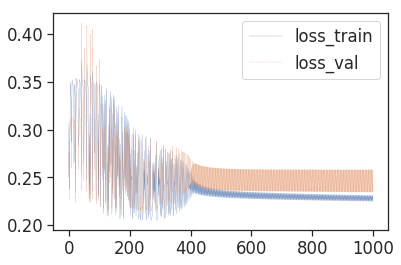

In [132]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df = pd.DataFrame({#'epoch' : range(0, 1000),
                   'loss_train' : error_t,
                   'loss_val' : error_v})

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": .2})
ax = sns.lineplot(data=df)

## Part 3: Perceptrons with L2 regularization (20 points)
In this section, we will implement perceptron and backpropagation with L2 regularization from scratch, and apply them to the same dataset from Part 1 again.

Train your perceptron with L2 regularization using the forward_pass and backward_pass functions for 1,000 epochs. Report the loss, accuracy, AUC for both the training and validation data sets. Plot the training and validation loss vs. epochs. Modify this cell to include your results and commentary on your approach.

Please do **NOT** use Keras, Pytorch, Lasagne, Tensorflow, or any other high-level abstraction machine learning frameworks. Upon completing this exercise from scratch, you will gain a deep understanding of what's under the hood of popular deep learning packages.

The only allowed packages are numpy, pandas, and matplotlib.pyplot. The roc_auc_score function in sklearn.metrics is also allowed, but other functions from sklearn are prohibited.

**No loops are allowed.** Please use only matrix, vector, or element-wise operations.

Hint: Think in terms of the forward pass, backward pass, cost function, and training mechanisms. Think how (some of them) would differ from part 2.

In [0]:
# Your codes and answers here
# I keep the forward pass and training mechanism constant. 
# The only thing that changes is the calculation of the loss/cost function
# Because the loss function is implemented in the backward pass, I keep redefine that function
# For the sake of simplicity, I set my weight parameter for the L2 loss to 1

def backward_pass_l2(y,X,p,w):
  # the derivative of the sigmoid function is the sigmoid*(1-sigmoid)
  # as the sigmoid is our output function, we can define the gradient of the
  # forward pass respective to the loss function (sum of squares). We then have 
  # to chain the weights or the intercept to the formula.
  ww = np.delete(w, 0) # isolating weights
  # I start with the intercept
  grad_wb = np.array([np.mean(2*(p-y)*p*(1-p)*1)]) #the intercept is not included in our L2 loss
  grad_ww = np.mean(X.mul(2*(p-y)*p*(1-p), axis = 0), axis = 0) + 2*ww #this returns a vector of weights
  # With this gradient calculated, we can update a new set of proposed weights.
  error = np.mean((p-y)**2) # I do not add the l2 loss to this prt of the function. That way, I can
  # compare the learning behaviour with the previous model
  w_new = np.concatenate([grad_wb, grad_ww.values])
  #print(error)
  return w_new, error


Now I can rerun the majority of the code produced above 


In [0]:
# Your codes and answers here

# initialize weights 
#w = np.array([0, 0.13, 0.03, -0.03, -0.08, -0.0004, -0.008, -0.5, -0.006])
w = np.zeros(9)
lr = 0.001
epochs = 1000

error_t = np.array([])
error_v = np.array([])

for i in range(0, epochs):
  # collect gradient update
  g_w = backward_pass_l2(y_train, X_train, forward_pass(X_train, w), w)[0]
  # estimate error on train and validation data
  error_t = np.append(error_t, backward_pass_l2(y_train, X_train, forward_pass(X_train, w), w)[1])
  error_v = np.append(error_v, backward_pass_l2(y_val, X_val, forward_pass(X_val, w), w)[1])
  # update weights
  w = w-lr*g_w

### Model performance for L2 regularization

In [135]:
# This is the model loss on the training data 
np.mean((forward_pass(X_train, w)-y_train)**2)

0.2152412741479742

In [136]:
# This is the model loss on the validation data 
np.mean((forward_pass(X_val, w)-y_val)**2)

0.21970779847831348

In [137]:
# This is the model accuracy on the training data. I used the function definition from lecture 2
len(np.where(np.round(forward_pass(X_train, w)) == y_train)[0])/float(len(y_train))

0.6938110749185668

In [138]:
# This is the model accuracy on the validation data
len(np.where(np.round(forward_pass(X_val, w)) == y_val)[0])/float(len(y_val))

0.7077922077922078

In [139]:
# This is the model auc on the training data
import sklearn
sklearn.metrics.roc_auc_score(y_train, forward_pass(X_train, w))

0.6860297092653603

In [140]:
# This is the model auc on the validation data
sklearn.metrics.roc_auc_score(y_val, forward_pass(X_val, w))

0.6394557823129252

### Loss over time for L2 regularization

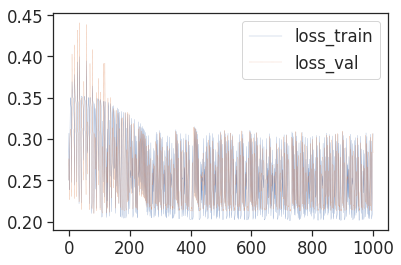

In [141]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df = pd.DataFrame({#'epoch' : range(0, 1000),
                   'loss_train' : error_t,
                   'loss_val' : error_v})

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": .2})
ax = sns.lineplot(data=df)

The L2 regularized model generalizes slightly better than the non-regularized counterpart. When we compare the weights of our perceptron to the logistic regression that I ran before, we can see similar trends in the parameter configuration. The neural network weights seem to be more heavily regularized.

In [142]:
ww = np.delete(w, 0)
df = pd.concat([pd.DataFrame({'name' : X_train.columns}),
           pd.DataFrame(np.transpose(clf.coef_))],axis = 1)
df['neural'] = ww

df

,name,0,neural
0,Pregnancies,0.131265,0.025457
1,Glucose,0.031740,0.035823
2,BloodPressure,-0.030721,-0.076095
3,SkinThickness,-0.008189,-0.004737
4,Insulin,-0.000414,-0.003673
5,BMI,0.079000,0.005304
6,DiabetesPedigreeFunction,0.523808,0.000945
7,Age,0.005901,0.007149


## Part 4: Multi-layer neural network using Keras (30 points)
In this section, we will train a multi-layer neural network using the Keras framework, and apply it to the dataset from Part 1.

### Question 4.1 Train a multi-layer neural network using Keras (20 points)
Please implement a neural network with at least one hidden layer using Keras, and plot the model accuracy and model loss in both the training and validation sets over the epochs.

Your neural network should have an accuracy > 0.7 when evaluated by the validation data set.

In [143]:
# Your codes and answers here
# library import code
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# define KERAS model
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=8))
model.add(Dropout(0.5)) # I play with dropout
model.add(Dense(1, activation='sigmoid'))

adam = Adam()

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
          epochs=1000,
          batch_size=256)

Train on 614 samples, validate on 154 samples
Epoch 1/1000
614/614 [==============================] - 1s 1ms/step - loss: 6.3861 - acc: 0.5065 - val_loss: 4.1719 - val_acc: 0.6753
Epoch 2/1000
614/614 [==============================] - 0s 20us/step - loss: 5.5467 - acc: 0.5700 - val_loss: 5.0804 - val_acc: 0.6818
Epoch 3/1000
614/614 [==============================] - 0s 17us/step - loss: 5.3454 - acc: 0.6042 - val_loss: 5.1273 - val_acc: 0.6818
Epoch 4/1000
614/614 [==============================] - 0s 17us/step - loss: 5.8471 - acc: 0.5749 - val_loss: 5.1285 - val_acc: 0.6818
Epoch 5/1000
614/614 [==============================] - 0s 22us/step - loss: 5.4347 - acc: 0.6075 - val_loss: 5.1285 - val_acc: 0.6818
Epoch 6/1000
614/614 [==============================] - 0s 22us/step - loss: 5.1976 - acc: 0.6368 - val_loss: 5.1285 - val_acc: 0.6818
Epoch 7/1000
614/614 [==============================] - 0s 21us/step - loss: 5.4631 - acc: 0.6189 - val_loss: 5.1285 - val_acc: 0.6818
Epoch 8/10

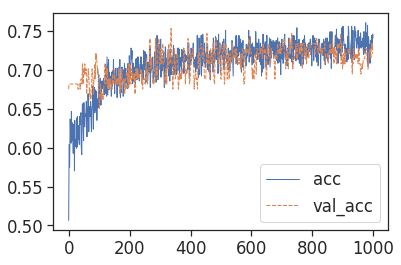

In [144]:
df_acc = pd.DataFrame({"acc" :history.history['acc'],
                   "val_acc" :history.history['val_acc']})
df_loss = pd.DataFrame({"loss" :history.history['loss'],
                   "val_loss" :history.history['val_loss']})

sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
ax = sns.lineplot(data=df_acc)

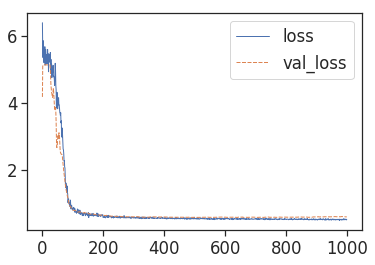

In [145]:
ax = sns.lineplot(data=df_loss)

### Question 4.2. Build a logistic regression model using the training set, and evaluate the training and validation set accuracy of the resulting model. (5 points)
Feel free to use any pre-built functions for logistic regression.

Hint: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

In [146]:
# Your codes and answers here
# I already created such a model in the first excercise, I copy the code from below
# I also add the same metrics
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:
# Training accuracy 
sklearn.metrics.accuracy_score(y_train, clf.predict(X_train))

0.7654723127035831

In [148]:
#Testing accuracy
sklearn.metrics.accuracy_score(y_val, clf.predict(X_val))

0.7337662337662337

Now I compare the two metrics to the final version of the neural network

In [149]:
# Training accuracy 
sklearn.metrics.accuracy_score(y_train, model.predict_classes(X_train))

0.760586319218241

In [150]:
#Testing accuracy
sklearn.metrics.accuracy_score(y_val, model.predict_classes(X_val))

0.7207792207792207

### Question 4.3. Does your multi-layer neural network perform better than the logistic regression model? Why or why not (name three reasons)? (5 points)
Word limit: 200 words.


In [0]:
# Your answers here

The neural network performs slightly worse on the validation dataset and slightly better on the training data. This is an indication for overfitting. Although I introduced a dropout of 0.5, the model still appears to be to flexible. 

In summary, these are potential reasons: 

*   Overfitting due to insufficient regularization
*   Overfitting due to many neurons in the hidden layer
*   Suboptimal optimizer choice

